# Understanding data

## Setup
### Imports
In order to work with data, we need to import some libraries.

In [2]:
import pandas as pd                     # for dataset manipulation (DataFrames)
import sklearn.datasets                 # the datasets we are going to use
import numpy as np                      # allows some mathematical operations
import matplotlib.pyplot as plt         # library used to display graphs
import seaborn as sns                   # more convenient visualization library for dataframes

### Loading the dataset

In [3]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

The dataset is now loaded into the `df` variable, which stands for "DataFrame".
DataFrames are objects proposed by the `pandas` library. They are basically convenient tables, with a lot of built-in functions to manipulate them.

You can see what the dataframe looks like by executing the cell below :

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## Data understanding
### Data source and documentation
Before even writing any code, it is important to check where the data is coming from and gather as much information as possible on the data it contains.
The iris dataset - that we loaded above - is a popular dataset to teach machine learning, meaning information is easily accessible on the internet.


#### Questions
**Before beginning the data analysis, find the answers to the following questions:**
- Who created the dataset? When and why?
- Describe briefly what the iris dataset contains.
- What information does the columns contain?
- In particular, what is the `target` column, and what does its values correspond to?

*Hint: We use the `scikit-learn` library to load the dataset.*


#### Answers
*[Your answers here]*


### Getting general information about the dataset

#### Questions

1. How much data does the dataset contain?
2. How many features (columns) are there?
3. Name the different columns and their data types.
4. For each column, check the values of the following statistics: mean, standard deviation, minimum, maximum, and median.
5. How do these values vary within each type of iris? *(Use the code sample below as reference)*

*Hint: You will need to use the pandas functions: `DataFrame.shape`, `DataFrame.head()`, `DataFrame.describe()`, and `DataFrame.info()`. Make sure to [check their documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)!*

In [5]:
# Below is a code sample to show you how to filter a DataFrame
filtered_data = df[df["sepal length (cm)"] > 5]
filtered_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
10,5.4,3.7,1.5,0.2,0.0
14,5.8,4.0,1.2,0.2,0.0
15,5.7,4.4,1.5,0.4,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# Your code here

*[Your answers here]*

### Basic validity checks

In order to use a dataset for machine learning, we generally want to have "clean" data. Generally, we want to avoid missing and absurd values, duplicates, and imbalanced datasets.

#### Questions
1. How many rows contain missing data?
2. What does it mean for a dataset to be "balanced"? Do you think this dataset is balanced?
3. Is there any duplicated data in the dataset? In your opinion, is it good or bad for machine learning? Why?

*Hint: You will need to use the `value_counts()` and `duplicated()` functions.*

In [7]:
# Your code here

*[Your answers here]*

### Making the data more convenient to use

You have probably noticed that the column names are quite long and also contain spaces, which is generally inconvenient in code. You can use the following code to change them:

In [8]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "species"]
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**Bonus question**: How else can you rename columns in a dataframe?

In [9]:
# Your code here

The `class_float` column is also a bit hard to read, because the classes are represented by numbers. This can be preferable for some algorithms, but for our use case today we will replace these values by explicit names. For this, we will use the `DataFrame.apply()` function.

In [10]:
# This is the function we will apply to the "class_float" column
def name_mapping(number:float):
    """This function maps 0.0, 1.0 and 2.0 to their corresponding values in the iris dataset."""

    name_map = {
        0.0: "class1", # replace by the correct name
        1.0: "class2", # replace by the correct name
        2.0: "class3", # replace by the correct name
    }

    if number not in name_map.keys(): # making sure the number is one of the expected values
        raise ValueError("Not a valid number!")

    return name_map[number] # This is an alternative to using a lot of if/else blocks

In [11]:
# We can now apply the function
df["species"] = df["species"].apply(name_mapping) # We pass the function as parameter, not its result! This is why we must not use parentheses.

In [12]:
# And check the result
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,class1
1,4.9,3.0,1.4,0.2,class1
2,4.7,3.2,1.3,0.2,class1
3,4.6,3.1,1.5,0.2,class1
4,5.0,3.6,1.4,0.2,class1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,class3
146,6.3,2.5,5.0,1.9,class3
147,6.5,3.0,5.2,2.0,class3
148,6.2,3.4,5.4,2.3,class3


## Data visualization

Data visualization will help us:
- Confirming and observing things we already know
- Learning new facts about the data

In this section **keep in mind that the goal of machine learning algorithms would be to classify the different species of iris**.

### Countplot
What does a `countplot` show? With what other function did you get similar results earlier?
Try experimenting with the parameters of the function.

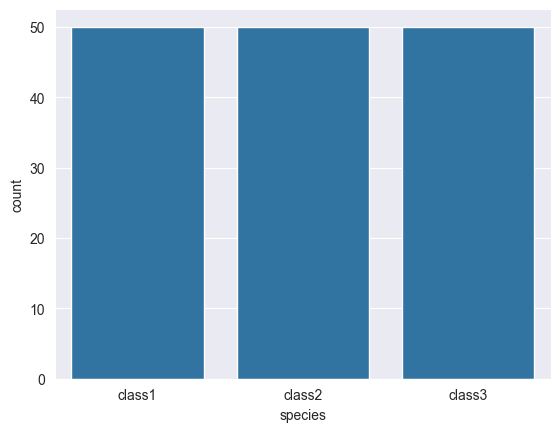

In [13]:
sns.countplot(x='species', data=df, )
plt.show()

### Boxplot
What does a `boxplot` show? With what other function did you get similar results earlier?
In your opinion, why would you need this type of graph?

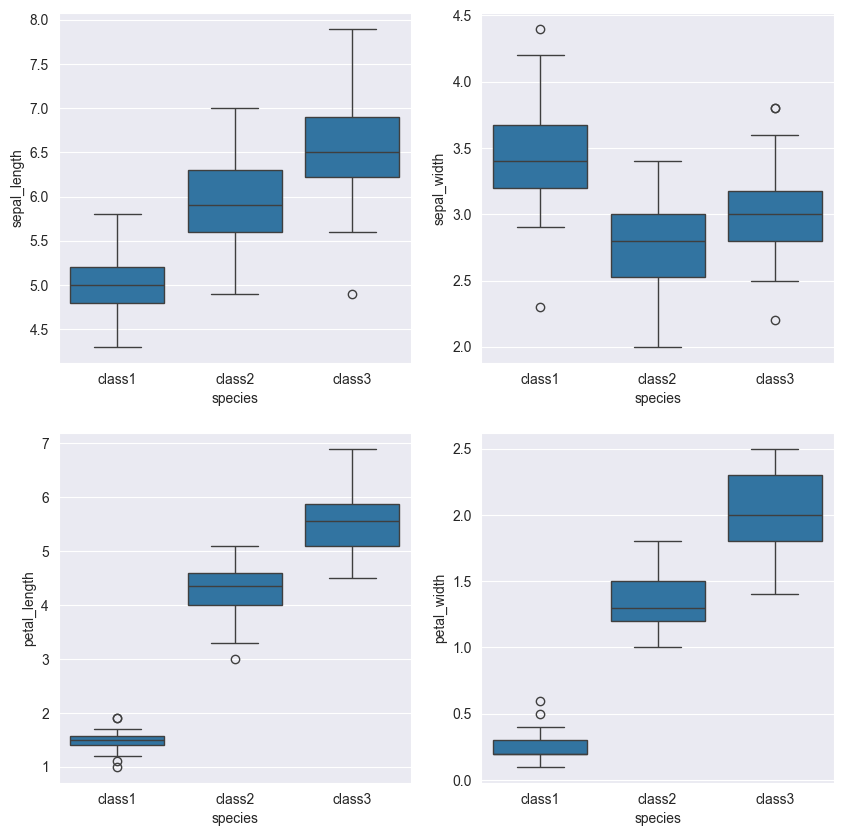

In [14]:
# Utility function to simplify syntax later on
def boxplot(y):
    sns.boxplot(x="species", y=y, data=df)

# We define a figure where we will be adding our graphs
plt.figure(figsize=(10,10))

# And then add the plots to the grid on specific positions
plt.subplot(221)
boxplot('sepal_length')

plt.subplot(222)
boxplot('sepal_width')

plt.subplot(223)
boxplot('petal_length')

plt.subplot(224)
boxplot('petal_width')

plt.show()

### Scatterplot
What does a `scatterplot` show?
What conclusions can you draw from this graph?
Try changing the inputs of the function. Does this change your observations? What new conclusions can you draw from this?

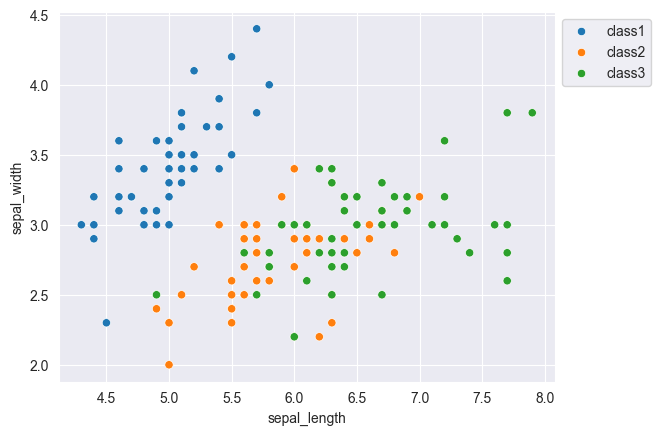

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, )
plt.legend(bbox_to_anchor=(1, 1), loc=2) # Displays the legend outside the graph
plt.show()

### Displot
What does a `displot` show?
In the documentation, find what the "kind" parameter does, and try all the kinds of plot.
Can you imagine a use for the kde plots?

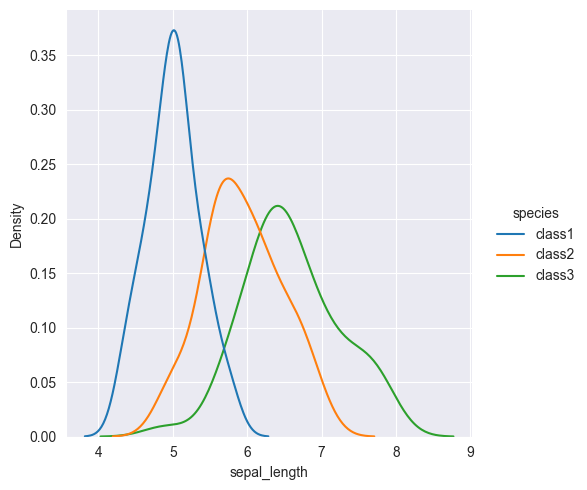

In [16]:
sns.displot(df, x="sepal_length", kind="kde", hue="species")

### Pairplot
What does a `pairplot` show?
Can you draw any new conclusions from it?
In your opinion, what could be the uses of such a graph?

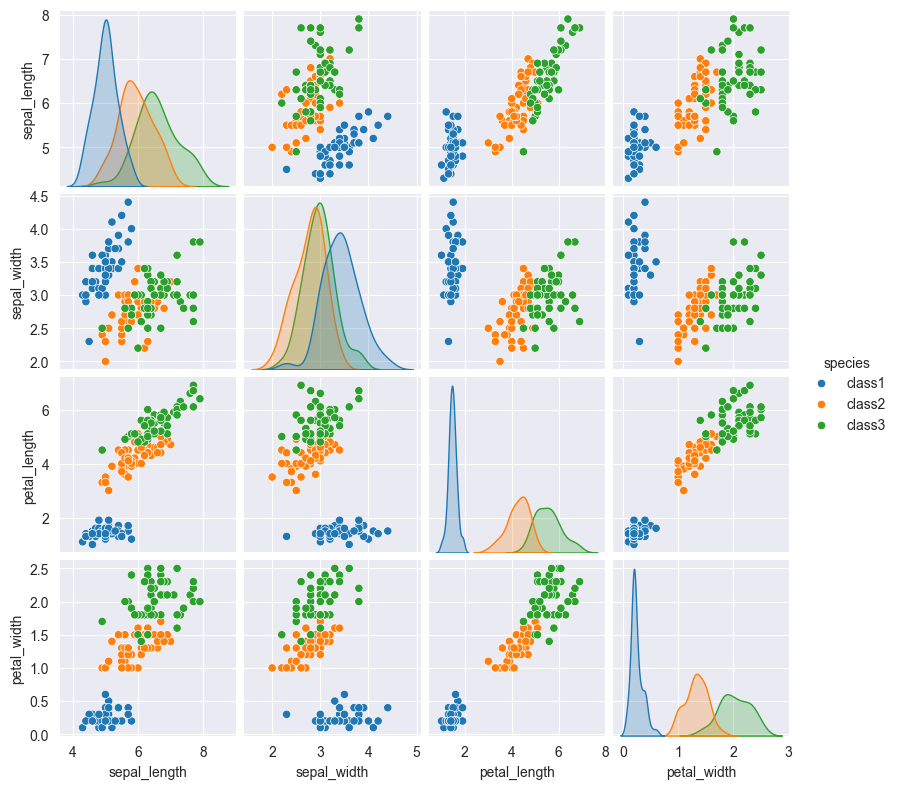

In [17]:
sns.pairplot(df, hue='species', height=2)

### Histogram
Histograms will not teach us anything new here, but they can be another way of visualizing data.

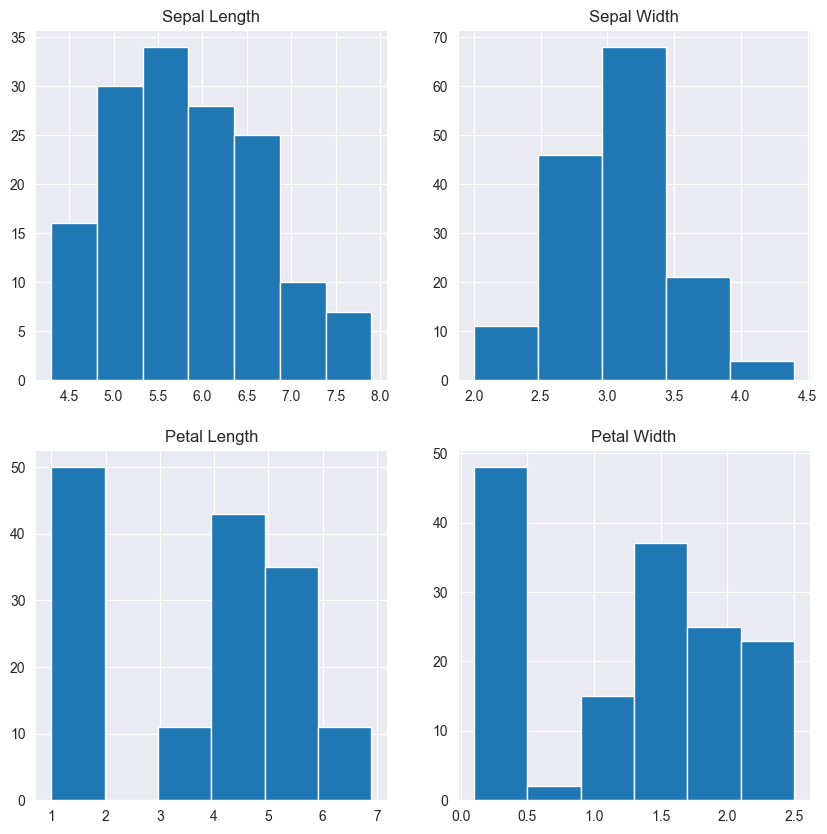

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

### Correlation
Correlation shows the relative importance of variables between each other. It can be computed directly with `pandas`.

In [19]:
df.corr(method='pearson')

ValueError: could not convert string to float: 'class1'

`heatmaps` make it easier to see which correlations are the most important.

In [ ]:
sns.heatmap(df.corr(method='pearson'),annot = True)
plt.show()

### Covariance
In the same way, try displaying the covariance matrix with a `heatmap`!

*Hint: You can access the covariance matrix with the `cov()` function.*

In [ ]:
# Your code here

## Try it yourself!
As an exercise, try analysing another dataset that you do no know. There are many datasets freely available on the internet. For example, try loading [another one of sklearn's toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html)!

In [ ]:
# Your code here